<a href="https://colab.research.google.com/github/mauney/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

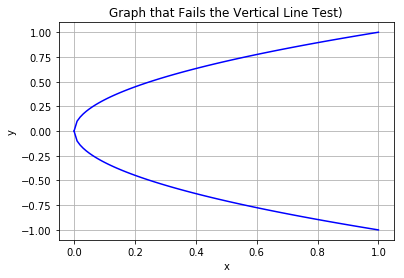

In [0]:
xs = np.linspace(0, 1, 101)
ysA = xs**(0.5)
ysB = ysA * (-1)
ysC = xs**2

plt.plot(xs, ysA, '-b')
plt.plot(xs, ysB, '-b')
plt.title('Graph that Fails the Vertical Line Test)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


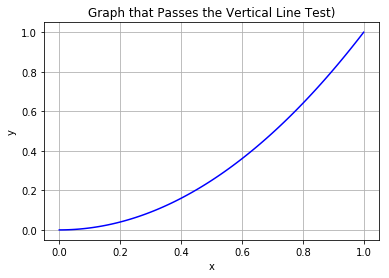

In [0]:
plt.plot(xs, ysC, '-b')
plt.title('Graph that Passes the Vertical Line Test)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

For at least one input `x` the output is ambiguous. One requirement for a function is that every valid input have a single output. A vertical line that intersects a graph at two or more points shows that the `x` position corresponding to the that line is associated with at two two would-be outputs.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relations 2 is the only function. All of the other listed relations have an `x` value repeated with a different associated `y` value.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

`m` is $\mathbb{R}^3$ => $\mathbb{R}^3$

`n` is $\mathbb{R}^4$ => $\mathbb{R}^2$

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes.
\begin{align}
f(𝑥)=(2x, x^2)\end{align}

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix} = P\begin{bmatrix} 1 & 3 \\ -1 & 2 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix} = Q\begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2 \\ \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

\begin{align}
p(\begin{bmatrix}3 \\ 4 \end{bmatrix}) = \begin{bmatrix} 3 + (3 * 4) \\ (2 * 4) - 3 \\  \end{bmatrix} = \begin{bmatrix} 15 \\ 5 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}5 \\ -1 \\ 3\end{bmatrix}) = \begin{bmatrix} (4 * 5) - 1 + (2 * 3) \\ (2 * (-1)) - 5 + (3 * 3) \\ (5* 5) - (2 * 3) - 1  \end{bmatrix} = \begin{bmatrix} 25 \\ 2 \\ 18 \\ \end{bmatrix}
\end{align}

In [0]:
P = np.array([[1, 3], [-1, 2]])
Q = np.array([[4, 1, 2], [-1, 2, 3], [5, 1, -2]])

a = [3, 4]
b = [5, -1, 3]

assert np.dot(P, a).tolist() == [15, 5]
assert np.dot(Q, b).tolist() == [25, 2, 18]

print(np.dot(P, a))
print(np.dot(Q, b))



[15  5]
[25  2 18]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

If a linear transformation does not alter a vector except to possibly change it's scale, that vector is an Eigenvector for that linear tranformation. The scaling factor is the vector's Eigenvalue. Not all transformations have non-zero Eigenvectors. If one or more can be found, they can be used in dimensional reduction.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

If there are more dimensions than observations, overfitting is an issue. As dimensions increase, models that rely on distance between points deteriorate because points move toward being equally spaced out. Computational complexity increases with each feature, yet each new feature brings diminishing marginal returns, all else being equal.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

At least five times as many observations as features is a good rule of thumb for a model.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
iris = df.iloc[:, :-1].values

In [0]:
# calculate the mean of each column
means = np.mean(iris.T, axis=1)
print("\n Means: \n", means)
# calculate the standard deviation of each column
std_devs = np.std(iris.T, axis=1)
print("\n Standard Deviations: \n", std_devs)
# standardize columns by subtracting column means and divide by std_devs
iris_standard = (iris - means) / std_devs
# calculate covariance matrix of centered matrix
covariance_matrix = np.cov(iris_standard.T)
print("\n Covariance Matrix: \n", covariance_matrix)
# eigendecomposition of covariance matrix
values, vectors = np.linalg.eig(covariance_matrix)
print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)
# project data
projected = vectors.T.dot(iris.T)


 Means: 
 [5.84333333 3.054      3.75866667 1.19866667]

 Standard Deviations: 
 [0.82530129 0.43214658 1.75852918 0.76061262]

 Covariance Matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]

 Eigenvectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

 Eigenvalues: 
 [2.93035378 0.92740362 0.14834223 0.02074601]


In [0]:
# flip sign on PC2; not sure why they values are negative
projected[1] = projected[1] * (-1)

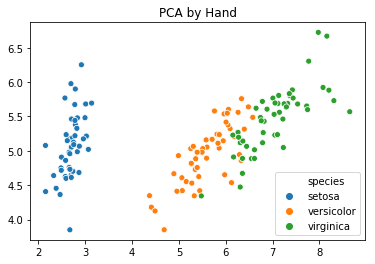

In [0]:
sns.scatterplot(x=projected[0], y=projected[1], hue=df['species'])
plt.title('PCA by Hand')
plt.show()

In [0]:
iris

## Let's try it with sklearn

In [0]:
# Principal Component Analysis
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [0]:
# scale the features
iris_scaled = preprocessing.scale(iris)
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(iris_standard)
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
# transform data
B = pca.transform(iris)


 Eigenvectors: 
 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]

 Eigenvalues: 
 [2.93035378 0.92740362]


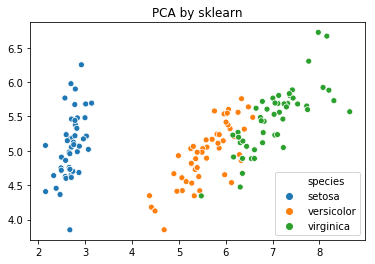

In [0]:
sns.scatterplot(x=B.T[0], y=B.T[1], hue=df['species'])
plt.title('PCA by sklearn')
plt.show()

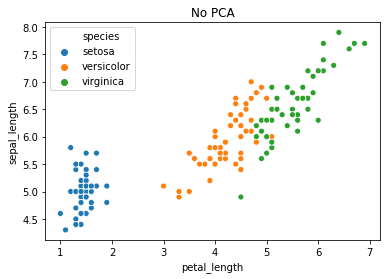

In [0]:
# without PCA, just two existing features for comparison with PCA
sns.scatterplot(x='petal_length', y='sepal_length', hue='species', data=df)
plt.title('No PCA')
plt.show()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)